# Building Classifiers

In [1]:
import Classification_Utils as cu
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Binary flag determines whether to convert data to 1 and 0 for presence/absence

## Load and combine data from all tissues

In [2]:
df = pd.read_csv('../../Data/Random-Data-Set/train_transcriptomics_random.csv')
df_test = pd.read_csv('../../Data/Random-Data-Set/test_transcriptomics_random.csv')
print(df.shape)
print(df_test.shape)

(82, 28058)
(82, 28058)


In [3]:
df.head()
df_test.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,labels
0,4.81,2.21,4.86,13.24,5.93,6.33,0.93,0.00,10.83,0.00,...,11.43,8.39,9.14,10.38,7.25,11.64,10.64,11.26,11.57,real
1,6.24,6.43,3.68,14.32,6.53,9.42,2.79,0.00,10.98,2.13,...,10.13,8.35,9.27,10.46,6.85,11.60,10.21,11.51,11.09,real
2,5.31,4.87,5.59,13.77,6.35,4.22,2.97,0.00,8.68,1.98,...,10.41,9.10,9.59,10.15,7.89,11.90,10.21,11.34,11.51,real
3,5.03,5.59,4.82,14.13,7.65,7.75,1.59,1.01,9.61,1.59,...,9.22,9.07,9.51,11.06,7.29,11.60,10.19,11.57,11.32,real
4,6.03,5.46,7.21,13.67,6.95,6.69,2.93,0.00,8.78,1.53,...,10.85,9.14,9.83,11.60,9.41,11.78,10.65,11.94,11.57,real


## Map each column to a corresponding label

In [4]:
column_names = df.columns.values.tolist()
#seporate labels from the main data
labels = df['labels']
df = df.drop(columns=['labels'])
#impute the NA with 0
df = df.fillna(0)

labels_test = df_test['labels']
df_test = df_test.drop(columns=['labels'])
#impute the NA with 0
df_test = df_test.fillna(0)

df.head()
df_test.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,4.81,2.21,4.86,13.24,5.93,6.33,0.93,0.00,10.83,0.00,...,10.87,11.43,8.39,9.14,10.38,7.25,11.64,10.64,11.26,11.57
1,6.24,6.43,3.68,14.32,6.53,9.42,2.79,0.00,10.98,2.13,...,10.06,10.13,8.35,9.27,10.46,6.85,11.60,10.21,11.51,11.09
2,5.31,4.87,5.59,13.77,6.35,4.22,2.97,0.00,8.68,1.98,...,10.29,10.41,9.10,9.59,10.15,7.89,11.90,10.21,11.34,11.51
3,5.03,5.59,4.82,14.13,7.65,7.75,1.59,1.01,9.61,1.59,...,9.23,9.22,9.07,9.51,11.06,7.29,11.60,10.19,11.57,11.32
4,6.03,5.46,7.21,13.67,6.95,6.69,2.93,0.00,8.78,1.53,...,10.76,10.85,9.14,9.83,11.60,9.41,11.78,10.65,11.94,11.57


## Make train-test split

In [5]:
# train_df, test_df, train_labels, test_labels = train_test_split(
#     df, labels, 
#     test_size=0.00,    # 30% of the data held out in test set
#     random_state=0,    # Setting random_state ensures the same train/test split occurs each time this is run
#     stratify=labels)   # Maintain ratio of tissues represented in each set

# train_features = train_df.columns.values.tolist()

In [6]:
# std_scaler = StandardScaler()
# train_df = std_scaler.fit_transform(train_df)
# test_df = std_scaler.fit_transform(test_df)

# min_max_scaler = MinMaxScaler()
# min_max_train_df = min_max_scaler.fit_transform(train_df)
# min_max_test_df = min_max_scaler.fit_transform(test_df)

## Train various classifiers, using cross-validation to produce an accuracy score (Supplementary Figure XXX)

In [7]:
NUM_SPLITS = 100 # number of train/test splits in cross validation

In [8]:
import time

### KNN

In [9]:
start = time.time()
knn = cu.knn_model_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.68 (+/- 0.00)
Runtime: 0.48186660607655846 minutes


In [10]:
#MLP TESTING AREA
start = time.time()
mlp = cu.mlp_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.64 (+/- 0.25)
Runtime: 3.387410521507263 minutes


### Logistic Regression

In [11]:
start = time.time()
lr = cu.logistic_regression_model_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 2.150116753578186 minutes


### Naive Bayes
* Gaussian
* Multinomial

In [12]:
start = time.time()
gnb = cu.bayes_gaussian_model_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 0.32 (+/- 0.02)
Runtime: 0.8565256436665852 minutes


### SVC 

In [13]:
start = time.time()
svc = cu.SVC_model_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 3.1416019042332968 minutes


### Aggregations
* Random Forest
* Gradient Boosting

In [14]:
start = time.time()
rf = cu.randomforest_model_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 0.45806670586268106 minutes


In [15]:
start = time.time()
gbc = cu.gradient_boosting_crossval(df, labels, NUM_SPLITS)
end = time.time()
print("Runtime:", (end - start)/60, "minutes")

accuracy: 1.00 (+/- 0.00)
Runtime: 22.605190551280977 minutes


## Classify Training Set

### Use models from notebook to predict new data

In [16]:
lr_pred = lr.predict(df_test)
lr_result = lr.score(df_test, labels_test)

# mnb_pred = mnb.predict(min_max_test_df)
# mnb_result = mnb.score(test_df, test_labels)

rf_pred = rf.predict(df_test)
rf_result = rf.score(df_test, labels_test)

svc_pred = svc.predict(df_test)
svc_result = svc.score(df_test, labels_test)

gbc_pred = gbc.predict(df_test)
gbc_result = gbc.score(df_test, labels_test)

gnb_pred = gnb.predict(df_test)
gnb_result = gnb.score(df_test, labels_test)

knn_pred = knn.predict(df_test)
knn_result = knn.score(df_test, labels_test)

mlp_pred = mlp.predict(df_test)
mlp_result = mlp.score(df_test, labels_test)

In [17]:
print(lr_result)
#print(mnb_result)
print(rf_result)
print(svc_result)
print(gbc_result)
print(gnb_result)
print(knn_result)
print(mlp_result)
results = [lr_result,rf_result,svc_result,gbc_result,gnb_result,knn_result,mlp_result]
learners = ['Logistic Regression','Random Forest','SVC','GBC','Naive Bayes','KNN','MLP']
final = pd.DataFrame({'score':results,'learner':learners})
final.head()

1.0
1.0
1.0
1.0
0.3048780487804878
0.6951219512195121
0.6951219512195121


,score,learner
0,1.000000,Logistic Regression
1,1.000000,Random Forest
2,1.000000,SVC
3,1.000000,GBC
4,0.304878,Naive Bayes


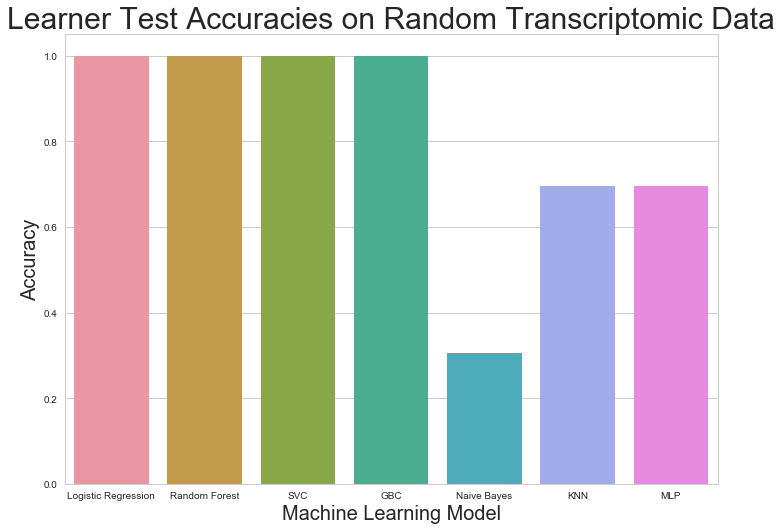

In [18]:
import seaborn as sns
sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)})

b = sns.barplot(data=final, x="learner", y="score")
b.axes.set_title('Learner Test Accuracies on Random Transcriptomic Data',fontsize=30)
b.set_xlabel("Machine Learning Model",fontsize=20)
b.set_ylabel("Accuracy",fontsize=20)
fig = b.get_figure()
fig.savefig("random-classification-accuracies-transcriptomics-test.png")